In [5]:
import requests
import pandas as pd

In [7]:
#constants
symbol="AAPL" #, "SCHD", "MSFT", "NVDA", "GOOG"]
interval="5min"
month="2025-02"
apikey="XXX"


In [39]:

API_URL=f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&month={month}&outputsize=full&apikey={apikey}"
r = requests.get(API_URL)
data_raw = r.json()
#data.update(data_raw)

list(data_raw['Time Series (5min)'].items())[:3]


[('2025-02-10 19:55:00',
  {'1. open': '227.0050',
   '2. high': '227.0300',
   '3. low': '226.9500',
   '4. close': '226.9995',
   '5. volume': '5547'}),
 ('2025-02-10 19:50:00',
  {'1. open': '227.0250',
   '2. high': '227.0500',
   '3. low': '226.9800',
   '4. close': '226.9800',
   '5. volume': '2965'}),
 ('2025-02-10 19:45:00',
  {'1. open': '227.0100',
   '2. high': '227.0400',
   '3. low': '226.9500',
   '4. close': '227.0250',
   '5. volume': '3356'})]

In [300]:
df_meta = pd.DataFrame.from_dict(data['Meta Data'], orient="index")
df_meta = df_meta.reset_index().rename(columns={"index": "Info", 0:"Details"})
df_meta

,Info,Details
0,1. Information,"Intraday (5min) open, high, low, close prices ..."
1,2. Symbol,GOOG
2,3. Last Refreshed,2025-02-05 19:55:00
3,4. Interval,5min
4,5. Output Size,Full size
5,6. Time Zone,US/Eastern


In [301]:
df_meta = df_meta.T
df_meta

,0,1,2,3,4,5
Info,1. Information,2. Symbol,3. Last Refreshed,4. Interval,5. Output Size,6. Time Zone
Details,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern


In [302]:
df_meta =df_meta.rename(columns={0:"Information"
                                               , 1:"Symbol"
                                               , 2:"Last Refreshed"
                                               , 3:"Interval"
                                               , 4:"Output Size"
                                               , 5:"TZ"
                                              })
df_meta = df_meta[1:2].reset_index()
df_meta.drop('index', axis=1, inplace=True)
df_meta

,Information,Symbol,Last Refreshed,Interval,Output Size,TZ
0,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern


In [303]:
df_time_series = pd.DataFrame.from_dict(data['Time Series (5min)'], orient="index")
df_time_series[:3]

,1. open,2. high,3. low,4. close,5. volume
2025-02-05 19:55:00,193.4000,193.4500,193.3500,193.4000,3588
2025-02-05 19:50:00,193.4500,193.4600,193.3000,193.4600,3274
2025-02-05 19:45:00,193.4000,193.4600,193.2848,193.4598,3113


In [304]:
df_time_series = df_time_series.reset_index()
df_time_series = df_time_series.rename(columns={"index":"Date"
                                                , "1. open":"Open"
                                                , "2. high":"High"
                                                , "3. low":"Low"
                                                , "4. close":"Close"
                                                , "5. volume":"Volume"
                                               }
                                      )
df_time_series[:5]

,Date,Open,High,Low,Close,Volume
0,2025-02-05 19:55:00,193.4000,193.4500,193.3500,193.4000,3588
1,2025-02-05 19:50:00,193.4500,193.4600,193.3000,193.4600,3274
2,2025-02-05 19:45:00,193.4000,193.4600,193.2848,193.4598,3113
3,2025-02-05 19:40:00,193.2800,193.3900,193.2500,193.3900,5457
4,2025-02-05 19:35:00,193.3000,193.3000,193.2450,193.2800,1288


In [305]:
rows_time_series = df_time_series.shape[0]

In [306]:
df_meta_expanded = pd.concat([df_meta] * rows_time_series, ignore_index=True)
df_meta_expanded

,Information,Symbol,Last Refreshed,Interval,Output Size,TZ
0,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
1,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
2,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
3,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
4,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
...,...,...,...,...,...,...
571,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
572,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
573,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
574,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern


In [307]:
df_horizontal = pd.concat([df_time_series, df_meta_expanded], axis=1)
df_horizontal[:5]

,Date,Open,High,Low,Close,Volume,Information,Symbol,Last Refreshed,Interval,Output Size,TZ
0,2025-02-05 19:55:00,193.4000,193.4500,193.3500,193.4000,3588,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
1,2025-02-05 19:50:00,193.4500,193.4600,193.3000,193.4600,3274,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
2,2025-02-05 19:45:00,193.4000,193.4600,193.2848,193.4598,3113,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
3,2025-02-05 19:40:00,193.2800,193.3900,193.2500,193.3900,5457,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern
4,2025-02-05 19:35:00,193.3000,193.3000,193.2450,193.2800,1288,"Intraday (5min) open, high, low, close prices ...",GOOG,2025-02-05 19:55:00,5min,Full size,US/Eastern


In [308]:
#print(df_horizontal.dtypes)
df_horizontal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            576 non-null    object
 1   Open            576 non-null    object
 2   High            576 non-null    object
 3   Low             576 non-null    object
 4   Close           576 non-null    object
 5   Volume          576 non-null    object
 6   Information     576 non-null    object
 7   Symbol          576 non-null    object
 8   Last Refreshed  576 non-null    object
 9   Interval        576 non-null    object
 10  Output Size     576 non-null    object
 11  TZ              576 non-null    object
dtypes: object(12)
memory usage: 54.1+ KB


In [309]:
df_horizontal['Dated']=pd.to_datetime(df_horizontal['Date'], format="%Y-%m-%d %H:%M:%S")
df_horizontal['Dated']=df_horizontal['Dated'].dt.date
df_horizontal['Hour']=pd.to_datetime(df_horizontal['Date'], format="%Y-%m-%d %H:%M:%S").dt.hour
df_horizontal['Open']=df_horizontal['Open'].astype(float)
df_horizontal['High']=df_horizontal['High'].astype(float)
df_horizontal['Low']=df_horizontal['Low'].astype(float)
df_horizontal['Close']=df_horizontal['Close'].astype(float)
df_horizontal['Volume']=df_horizontal['Volume'].astype(float)
#df_horizontal[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
#df['col1'] = df['col1'].astype(str)
df_horizontal.dtypes

Date               object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
Information        object
Symbol             object
Last Refreshed     object
Interval           object
Output Size        object
TZ                 object
Dated              object
Hour                int32
dtype: object

In [310]:
df_horizontal_grouping = df_horizontal.groupby(['Dated','Hour', 'Symbol', 'Interval', 'Output Size', 'TZ'])\
                                           .agg({
                                                   'Open':['sum', 'mean']
                                                 , 'High':['sum', 'mean']
                                                 , 'Low':['sum', 'mean']
                                                 , 'Close':['sum', 'mean']
                                                 , 'Volume':['sum', 'mean']
                                                }
                                               )
df_horizontal_grouping.columns = ['Open_Sum','Open_Mean','High_Sum','High_Mean','Low_Sum','Low_Mean','Close_Sum','Close_Mean','Volume_Sum','Volume_Mean']
df_horizontal_grouping = df_horizontal_grouping.reset_index()
df_horizontal_grouping[:3]


,Dated,Hour,Symbol,Interval,Output Size,TZ,Open_Sum,Open_Mean,High_Sum,High_Mean,Low_Sum,Low_Mean,Close_Sum,Close_Mean,Volume_Sum,Volume_Mean
0,2025-02-03,4,GOOG,5min,Full size,US/Eastern,2414.00,201.166667,2415.57,201.297500,2408.58,200.715000,2412.40,201.033333,38959.0,3246.583333
1,2025-02-03,5,GOOG,5min,Full size,US/Eastern,2416.20,201.350000,2418.21,201.517500,2415.25,201.270833,2416.88,201.406667,23781.0,1981.750000
2,2025-02-03,6,GOOG,5min,Full size,US/Eastern,2421.36,201.780000,2421.88,201.823333,2419.75,201.645833,2420.84,201.736667,19156.0,1596.333333


In [340]:
df_horizontal_grouping['Dated'].unique()

array([datetime.date(2025, 2, 3), datetime.date(2025, 2, 4),
       datetime.date(2025, 2, 5)], dtype=object)

In [311]:
df_horizontal_grouping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dated        48 non-null     object 
 1   Hour         48 non-null     int32  
 2   Symbol       48 non-null     object 
 3   Interval     48 non-null     object 
 4   Output Size  48 non-null     object 
 5   TZ           48 non-null     object 
 6   Open_Sum     48 non-null     float64
 7   Open_Mean    48 non-null     float64
 8   High_Sum     48 non-null     float64
 9   High_Mean    48 non-null     float64
 10  Low_Sum      48 non-null     float64
 11  Low_Mean     48 non-null     float64
 12  Close_Sum    48 non-null     float64
 13  Close_Mean   48 non-null     float64
 14  Volume_Sum   48 non-null     float64
 15  Volume_Mean  48 non-null     float64
dtypes: float64(10), int32(1), object(5)
memory usage: 5.9+ KB


In [312]:
import matplotlib.pyplot as plt
from decimal import Decimal

In [313]:
end_index = df_horizontal[['High']].max().iloc[0]
start_index = df_horizontal[['Low']].min().iloc[0]
end_index = int(float(end_index))
start_index = int(float(start_index))

In [314]:
x = df_horizontal_grouping['Open_Mean']#.where(df_horizontal["Date"] > 30)
x = x.tolist()
y = df_horizontal_grouping['High_Mean']
y = y.tolist()
#y=[num for num in range(start_index, end_index+1)]


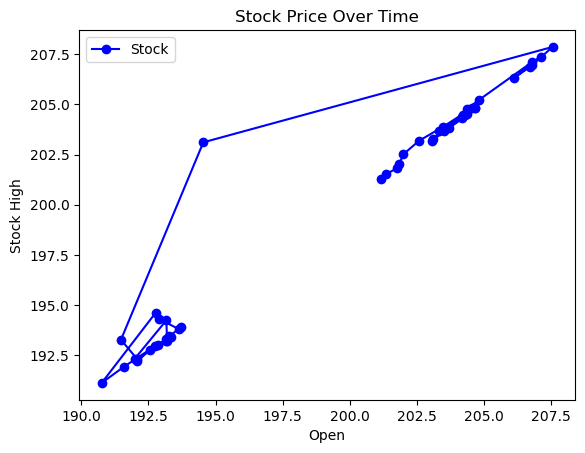

In [315]:
# Create plot
plt.plot(x, y, marker="o", linestyle="-", color="b", label="Stock")

# Add labels & title
plt.xlabel("Open")
plt.ylabel("Stock High")
plt.title("Stock Price Over Time")

# Show legend
plt.legend()

# Display the chart
plt.show()

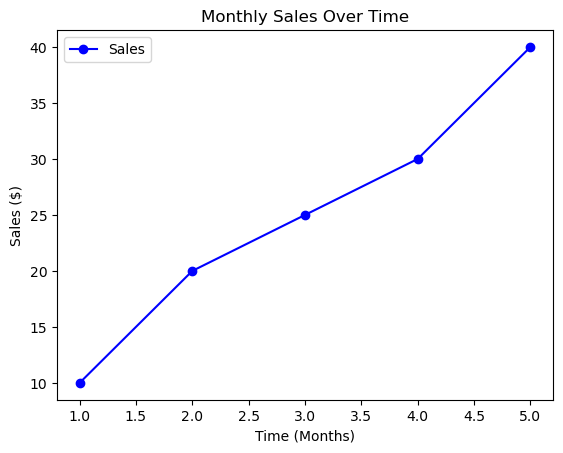

In [316]:
import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]

# Create plot
plt.plot(x, y, marker="o", linestyle="-", color="b", label="Sales")

# Add labels & title
plt.xlabel("Time (Months)")
plt.ylabel("Sales ($)")
plt.title("Monthly Sales Over Time")

# Show legend
plt.legend()

# Display the chart
plt.show()
